<a href="https://colab.research.google.com/github/shahcharu/DeepFake_Image_Recognition/blob/main/DeepFake_DCT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import os
from skimage import io
from skimage.transform import resize
from sklearn.feature_extraction import image
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.fftpack import dct
import tensorflow as tf

# Function to extract DCT features from an image
def extract_dct(img):
    img = dct(img, type=2, norm="ortho", axis=0)
    img = dct(img, type=2, norm="ortho", axis=1)
    img = np.abs(img)
    img+= 1e-13
    img = tf.math.log(img)
    img-=np.mean(img)
    img=np.divide(img,np.std(img))
    return img


# Function to load images from folder
def load_images_from_folder(folder_path, image_size=(128, 128)):
    images = []
    for filename in os.listdir(folder_path):
        img = io.imread(os.path.join(folder_path, filename), as_gray=True)
        img = resize(img, image_size)
        images.append(img)
    return images

# Load real and fake images from folders
real_images = load_images_from_folder('/content/drive/MyDrive/Fake images/Dataset/Real Images')
fake_images = load_images_from_folder('/content/drive/MyDrive/Fake images/Dataset/Fake Images')

# Extract DCT features from images
X_real = np.array([extract_dct(img) for img in real_images])
X_fake = np.array([extract_dct(img) for img in fake_images])

# Create labels for real and fake images
y_real = np.ones(X_real.shape[0])
y_fake = np.zeros(X_fake.shape[0])

# Combine real and fake images and labels
X = np.vstack((X_real, X_fake))
y = np.hstack((y_real, y_fake))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Ridge Regression classifier
ridge_clf = RidgeClassifier(alpha=1.0)
ridge_clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = ridge_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


ValueError: Found array with dim 3. RidgeClassifier expected <= 2.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.7/310.7 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 54.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 8.8 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.2-py3-none-any.whl size

In [15]:
import numpy as np
import os
from skimage import io
from skimage.transform import resize
from sklearn.feature_extraction import image
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.fftpack import dct
import tensorflow as tf
import matplotlib.pyplot as plt
import gradio as gr
# Function to extract DCT features from an image
def extract_dct(img):
    img = dct(img, type=2, norm="ortho", axis=0)
    img = dct(img, type=2, norm="ortho", axis=1)
    img = np.abs(img)
    img += 1e-13
    img = np.log(img)
    img -= np.mean(img)
    img /= np.std(img)

    return img.flatten()

# Function to load images from folder
def load_images_from_folder(folder_path, image_size=(128, 128)):
    images = []
    for filename in os.listdir(folder_path):
        img = io.imread(os.path.join(folder_path, filename), as_gray=True)
        img = resize(img, image_size)
        images.append(img)
    return images

# Load real and fake images from folders
real_images = load_images_from_folder('/content/drive/MyDrive/Fake images/Dataset/Real Images')
fake_images = load_images_from_folder('/content/drive/MyDrive/Fake images/Dataset/Fake Images')

# Extract DCT features from images
X_real = np.array([extract_dct(img) for img in real_images])
X_fake = np.array([extract_dct(img) for img in fake_images])
# Create labels for real and fake images
y_real = np.ones(len(X_real))
y_fake = np.zeros(len(X_fake))
# Combine real and fake images
X = np.vstack((X_real, X_fake))
# Combine real and fake labels
y = np.hstack((y_real, y_fake))
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train Ridge Regression classifier
ridge_clf = RidgeClassifier(alpha=1.0)
ridge_clf.fit(X_train, y_train)
# Predict on the testing set
y_pred = ridge_clf.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
import pickle
with open('my_model.pkl', 'wb') as f:
    pickle.dump(ridge_clf, f)


Accuracy: 1.0


In [23]:
import numpy as np
import pickle
from skimage import io
from skimage.transform import resize
from scipy.fftpack import dct

def extract_dct(img):
    img = dct(img, type=2, norm="ortho", axis=0)
    img = dct(img, type=2, norm="ortho", axis=1)
    img = np.abs(img)
    img += 1e-13
    img = np.log(img)
    img -= np.mean(img)
    img /= np.std(img)
    return img.flatten()

def preprocess_image(image_path, image_size=(128, 128)):
    img = io.imread(image_path, as_gray=True)
    img = resize(img, image_size)
    dct_features = extract_dct(img)
    return dct_features

# Load the saved model
with open('my_model.pkl', 'rb') as f:
    ridge_clf = pickle.load(f)

# Get the file path of the input image and preprocess it
image_path = "/content/00003.png"
dct_features = preprocess_image(image_path)

# Make a prediction on the preprocessed image
prediction = ridge_clf.predict([dct_features])
if prediction[0] == 1:
    label = "Real"
elif prediction[0] == 0:
    label = "Fake"
else:
    print("Error")
print(f"Prediction: {label}")

Prediction: Real


In [34]:
import streamlit as st
import numpy as np
import pickle
from skimage import io
from skimage.transform import resize
from scipy.fftpack import dct

# Load the pre-trained model
with open('my_model.pkl', 'rb') as f:
    ridge_clf = pickle.load(f)

# Function to preprocess the image
def preprocess_image(image_path, image_size=(128, 128)):
    img = io.imread(image_path, as_gray=True)
    img = resize(img, image_size)
    img = extract_dct(img)
    return img

# Function to extract DCT features
def extract_dct(img):
    img = dct(img, type=2, norm="ortho", axis=0)
    img = dct(img, type=2, norm="ortho", axis=1)
    img = np.abs(img)
    img += 1e-13
    img = np.log(img)
    img -= np.mean(img)
    img /= np.std(img)
    return img.flatten()

# Function to make prediction
def predict_image(image):
    try:
        # Preprocess the image
        dct_features = preprocess_image(image)
        # Make prediction
        prediction = ridge_clf.predict([dct_features])
        if prediction[0] == 1:
            label = "Real"
        elif prediction[0] == 0:
            label = "Fake"
        else:
            label = "Unknown"
        return label
    except Exception as e:
        st.error(f"An error occurred during prediction: {e}")
        return "Error"

# Streamlit app
def main():
    st.title("Image Forgery Detection")
    uploaded_file = st.file_uploader("Upload Image", type=['png', 'jpg', 'jpeg'])

    if uploaded_file is not None:
        # Display the uploaded image
        st.image(uploaded_file, caption='Uploaded Image', use_column_width=True)
        # Make prediction when button is clicked
        if st.button('Predict'):
            prediction = predict_image(uploaded_file)
            st.write(f"Prediction: {prediction}")

if __name__ == '__main__':
    main()


2024-03-09 18:22:23.818 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]


In [35]:
streamlit run app.py


SyntaxError: invalid syntax (<ipython-input-35-03ca03d515b4>, line 1)

In [33]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 54.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.7 MB/s eta 0:00:00


In [26]:
pip install -U gradio


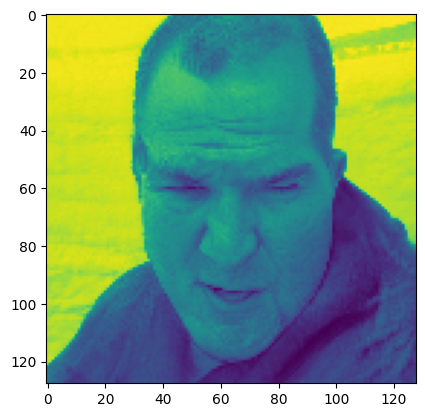

Accuracy: 0.5475


In [ ]:
import numpy as np
import os
from skimage import io
from skimage.transform import resize
from sklearn.feature_extraction import image
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.fftpack import dct
import tensorflow as tf
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
from tensorflow.python.framework import ops

%matplotlib inline
np.random.seed(1)
# Function to extract DCT features from an image
def extract_dct(img):
    img = dct(img, type=2, norm="ortho", axis=0)
    img = dct(img, type=2, norm="ortho", axis=1)
    img = np.abs(img)
    img += 1e-13
    img = np.log(img)
    img -= np.mean(img)
    img /= np.std(img)
    return img.flatten()

def pixel_image(img):
   return img.flatten()

# Function to load images from folder
def load_images_from_folder(folder_path, image_size=(128, 128)):
    images = []
    for filename in os.listdir(folder_path):
        img = io.imread(os.path.join(folder_path, filename), as_gray=True)
        img = resize(img, image_size)
        images.append(img)
    return images

# Load real and fake images from folders
real_images = load_images_from_folder('/content/drive/MyDrive/Fake images/Dataset/Real Images')
fake_images = load_images_from_folder('/content/drive/MyDrive/Fake images/Dataset/Fake Images')
index = 124
plt.imshow(fake_images[index]) #display sample training image
plt.show()
# Extract DCT features from images
X_real = np.array([pixel_image(img) for img in real_images])
X_fake = np.array([pixel_image(img) for img in fake_images])
# Create labels for real and fake images
y_real = np.ones(len(X_real))
y_fake = np.zeros(len(X_fake))
# Combine real and fake images
X = np.vstack((X_real, X_fake))
# Combine real and fake labels
y = np.hstack((y_real, y_fake))
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train Ridge Regression classifier
ridge_clf = RidgeClassifier(alpha=1.0)
ridge_clf.fit(X_train, y_train)
# Predict on the testing set
y_pred = ridge_clf.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
